In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [6]:
#  Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Drop rows with missing dates or critical values (e.g., total_cases or total_deaths)
df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

#  Convert date column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

#  Sort by country and date before interpolation
df_filtered.sort_values(by=['location', 'date'], inplace=True)

#  Handle missing numeric values by interpolating only numeric columns
numeric_cols = df_filtered.select_dtypes(include=['number']).columns
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate(method='linear')

#  Confirm result
print(df_filtered.head())

       iso_code continent location       date  total_cases  new_cases  \
173549      IND      Asia    India 2020-01-05          0.0        0.0   
173550      IND      Asia    India 2020-01-06          0.0        0.0   
173551      IND      Asia    India 2020-01-07          0.0        0.0   
173552      IND      Asia    India 2020-01-08          0.0        0.0   
173553      IND      Asia    India 2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN           0.0         0.0                  NaN   
173550                 NaN           0.0         0.0                  NaN   
173551                 NaN           0.0         0.0                  NaN   
173552                 NaN           0.0         0.0                  NaN   
173553                 NaN           0.0         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
173549  ...      

In [7]:
# Filter countries
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)].copy()

# Clean data
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths']]
df.dropna(subset=['date'], inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['location', 'date'], inplace=True)
df[['total_cases', 'new_cases', 'total_deaths']] = df[['total_cases', 'new_cases', 'total_deaths']].interpolate()

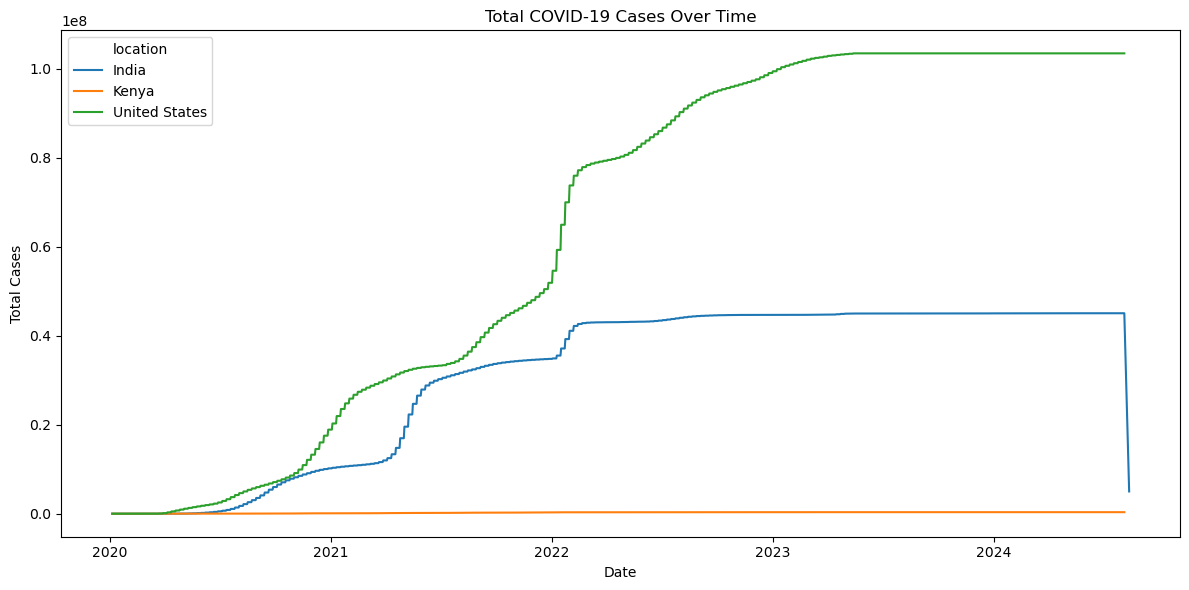

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

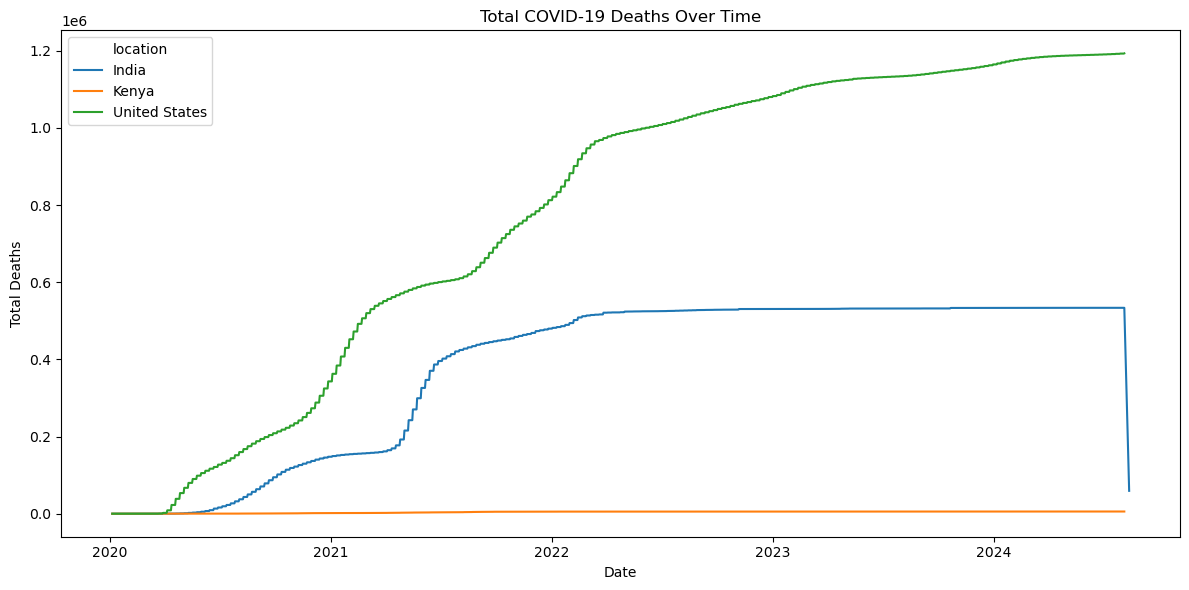

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

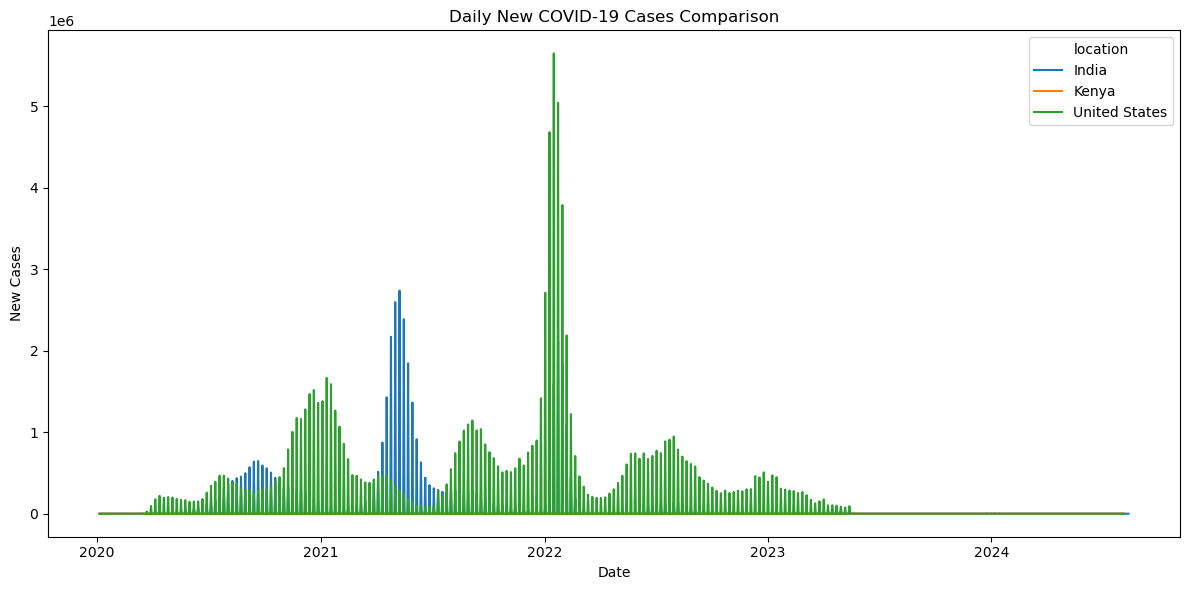

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()

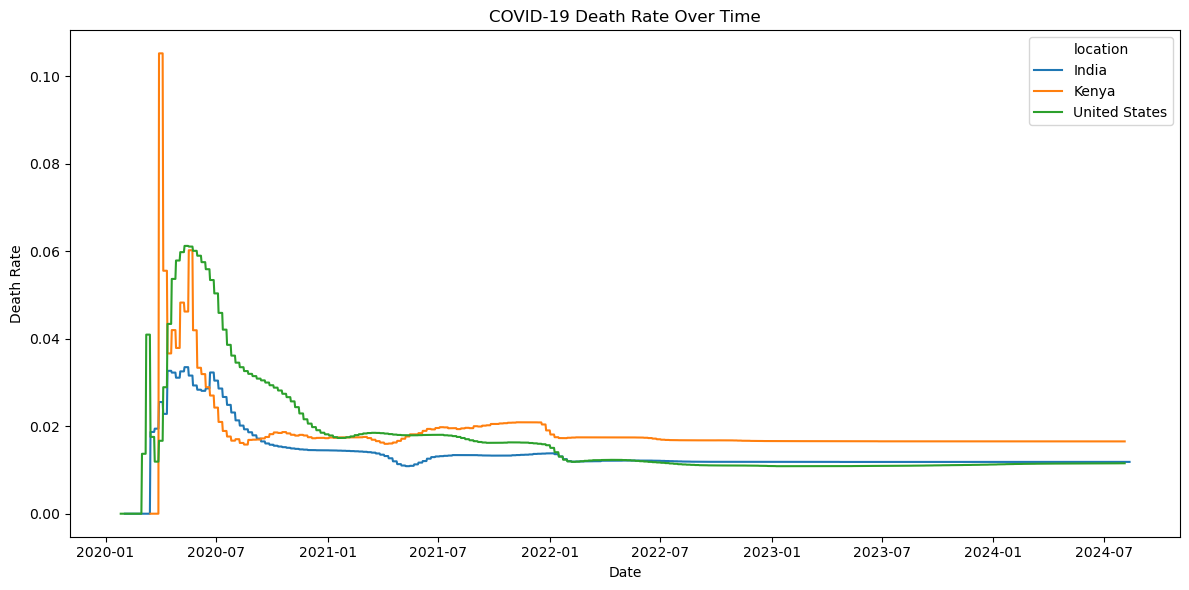

In [11]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.tight_layout()
plt.show()

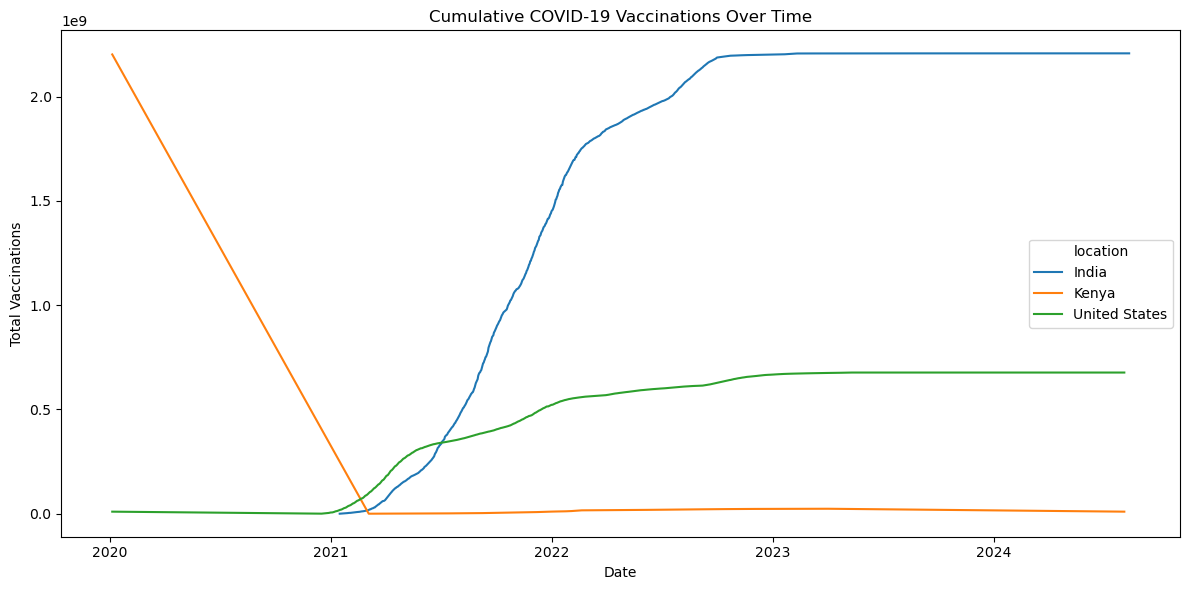

In [12]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filter relevant countries
countries = ['Kenya', 'United States', 'India']
df_vax = df[df['location'].isin(countries)][[
    'location', 'date', 'total_vaccinations', 'people_vaccinated_per_hundred', 'population'
]].copy()

# Clean up
df_vax.dropna(subset=['date'], inplace=True)
df_vax['date'] = pd.to_datetime(df_vax['date'])
df_vax.sort_values(by=['location', 'date'], inplace=True)
df_vax[['total_vaccinations', 'people_vaccinated_per_hundred']] = df_vax[[
    'total_vaccinations', 'people_vaccinated_per_hundred'
]].interpolate()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vax, x='date', y='total_vaccinations', hue='location')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.tight_layout()
plt.show()

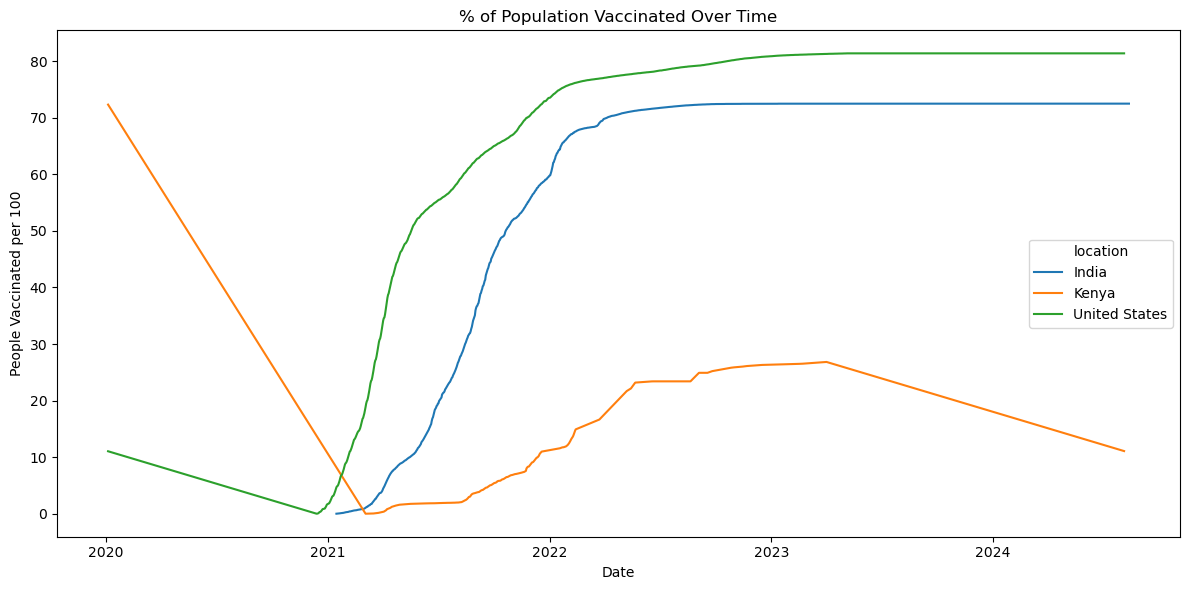

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vax, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title('% of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated per 100')
plt.tight_layout()
plt.show()

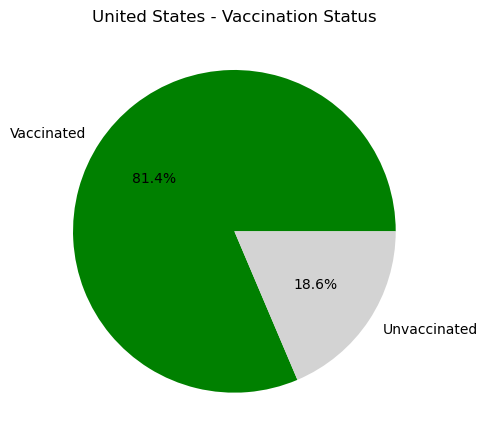

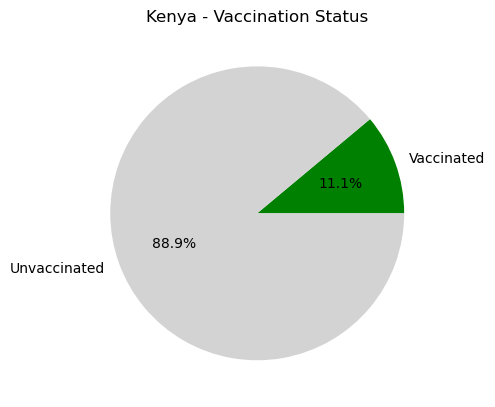

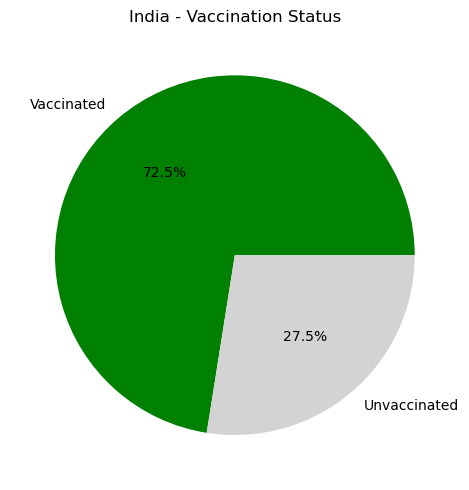

In [14]:
# Get the most recent vaccination percentage
latest_vax = df_vax.sort_values('date').groupby('location').tail(1)

for _, row in latest_vax.iterrows():
    vaccinated = row['people_vaccinated_per_hundred']
    unvaccinated = 100 - vaccinated
    plt.figure(figsize=(5, 5))
    plt.pie([vaccinated, unvaccinated],
            labels=['Vaccinated', 'Unvaccinated'],
            autopct='%1.1f%%',
            colors=['green', 'lightgray'])
    plt.title(f"{row['location']} - Vaccination Status")
    plt.tight_layout()
    plt.show()

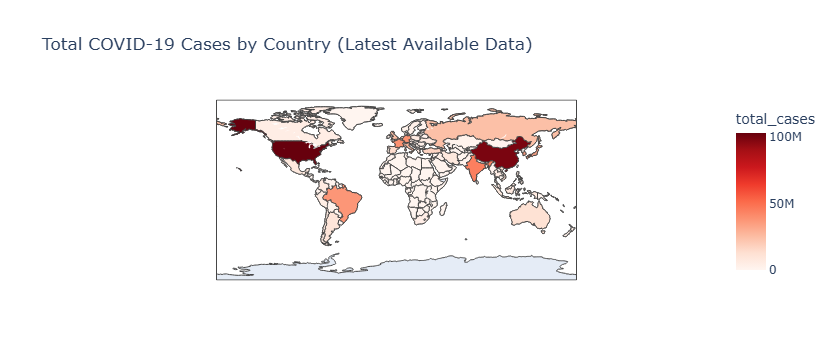

In [17]:
# Load the dataset
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Get latest data per country
latest_df = df.sort_values('date').groupby('iso_code', as_index=False).last()

# Filter out aggregate rows (e.g., continents, World)
latest_df = latest_df[latest_df['iso_code'].str.len() == 3]

# Create choropleth
fig = px.choropleth(
    latest_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Total COVID-19 Cases by Country (Latest Available Data)'
)

fig.show()

In [18]:
pwd

'/home/09876aef-2de8-4802-a0c8-d0e2a97d9ce4/week8'